# Capstone Project- The Battle of the Neighborhoods (Week 2)

## Introduction

The main goal of this project is to help those who are looking to buy a house in Lisbon. 
In this context, an analysis of the variation of houses' costs over the different parishes is considered as well as a differentiation of the different places as being residential or commercial areas based on the venues nearby. 

## Data

The information of the Lisbon’s housing market is based on a Kaggle dataset (Lisbon House Prices) that includes the number of bedrooms/bathrooms, area net (m2), house price, price per m2 for the different parishes in Lisbon. This data also includes the latitude and longitude that can be utilized for collecting the closest venues by the Foursquare application. After the data collection, the k-means clustering is utilized to divide each parish into residential and commercial areas. 

## Code

First step of  the code is to import all the libraries required 

In [144]:
import pandas as pd
import numpy as np

from botocore.client import Config
import ibm_boto3

import os, types

import seaborn as sns
import matplotlib.pyplot as plt
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from geopy.geocoders import Nominatim
import folium

# import k-means from clustering stage
from sklearn.cluster import KMeans

#### Get Data from Kaggle (Lisbon Houses Prices)

The csv file is added to Data files of the project
You can find the file in Github folder of the Coursera_Capstone

In [147]:
# The code was removed by Watson Studio for sharing.

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Country,District,Municipality,Parish,Price M2,Price
0,101,Used,Homes,Apartment,3,1,76,152,0,38.7792,-9.1186,Portugal,Lisboa,Lisboa,Olivais,2463,198000
1,102,Used,Homes,Duplex,5,3,190,380,0,38.7056,-9.1784,Portugal,Lisboa,Lisboa,Alcantara,3125,1270000
2,103,Used,Homes,Apartment,1,1,26,52,0,38.7058,-9.1639,Portugal,Lisboa,Lisboa,Estrela,4005,140000
3,104,Used,Homes,Apartment,5,4,185,370,0,38.7466,-9.1640,Portugal,Lisboa,Lisboa,Sao Domingos de Benfica,3412,995000
4,105,Used,Homes,Apartment,7,1,150,300,0,38.7323,-9.1287,Portugal,Lisboa,Lisboa,Arroios,3277,570000


### Pre-processing and visualizing the data

In [148]:
df_Lisbon_Houses.shape

(246, 17)

There are 246 houses in the dataset with 17 features (Id, Condition, PropertyType, PropertySubType,Bedrooms,Bathrooms,Area Net, Area Gross, Parking, Latitude, Longitude, Country, District, Municipality, Parish, Price/M2 and Price)

In [149]:
df_Lisbon_Houses.describe()

,Id,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Price M2,Price
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,2.460000e+02
mean,226.670732,2.491870,1.845528,109.662602,219.325203,0.154472,38.733106,-9.140051,3487.873984,5.516588e+05
std,72.308419,1.354484,1.034369,66.261664,132.523328,0.503579,0.020778,0.032356,715.896079,4.220916e+05
min,101.000000,0.000000,0.000000,23.000000,46.000000,0.000000,38.696300,-9.224400,2393.000000,8.500000e+04
25%,166.250000,2.000000,1.000000,64.250000,128.500000,0.000000,38.716900,-9.160700,2881.000000,2.712500e+05
50%,227.500000,2.000000,2.000000,90.000000,180.000000,0.000000,38.730050,-9.136800,3402.000000,4.500000e+05
75%,288.750000,3.000000,2.000000,145.000000,290.000000,0.000000,38.745800,-9.113575,3859.000000,7.150000e+05
max,350.000000,11.000000,6.000000,573.000000,1146.000000,3.000000,38.789900,-9.093800,5340.000000,4.150000e+06


By the describe function, it is possible to see that there are no missing data in the dataset (count corresponds to the number of houses )

In [150]:
df_Lisbon_Houses.dtypes

Id                   int64
Condition           object
PropertyType        object
PropertySubType     object
Bedrooms             int64
Bathrooms            int64
AreaNet              int64
AreaGross            int64
Parking              int64
Latitude           float64
Longitude          float64
Country             object
District            object
Municipality        object
Parish              object
Price M2             int64
Price                int64
dtype: object

The types of the columns seems compatible with the headers description

### Now let's analyze each feature:

#### Parish Feature:

In [151]:
df_Lisbon_Houses['Parish'].value_counts()

Marvila                    51
Campo de Ourique           23
Estrela                    17
Santa Maria Maior          17
Arroios                    16
Sao Vicente                14
Penha de Franca            12
Olivais                    11
Belem                      11
Alvalade                    8
Santo Antonio               8
Parque das Nacoes           8
Avenidas Novas              8
Lumiar                      7
Campolide                   6
Sao Domingos de Benfica     6
Benfica                     5
Ajuda                       5
Misericordia                4
Alcantara                   3
Carnide                     2
Santa Clara                 2
Areeiro                     1
Beato                       1
Name: Parish, dtype: int64

[Text(0, 0, 'Olivais'),
 Text(0, 0, 'Alcantara'),
 Text(0, 0, 'Estrela'),
 Text(0, 0, 'Sao Domingos de Benfica'),
 Text(0, 0, 'Arroios'),
 Text(0, 0, 'Belem'),
 Text(0, 0, 'Marvila'),
 Text(0, 0, 'Lumiar'),
 Text(0, 0, 'Santa Maria Maior'),
 Text(0, 0, 'Parque das Nacoes'),
 Text(0, 0, 'Santa Clara'),
 Text(0, 0, 'Alvalade'),
 Text(0, 0, 'Campolide'),
 Text(0, 0, 'Misericordia'),
 Text(0, 0, 'Benfica'),
 Text(0, 0, 'Penha de Franca'),
 Text(0, 0, 'Sao Vicente'),
 Text(0, 0, 'Avenidas Novas'),
 Text(0, 0, 'Campo de Ourique'),
 Text(0, 0, 'Santo Antonio'),
 Text(0, 0, 'Ajuda'),
 Text(0, 0, 'Carnide'),
 Text(0, 0, 'Areeiro'),
 Text(0, 0, 'Beato')]

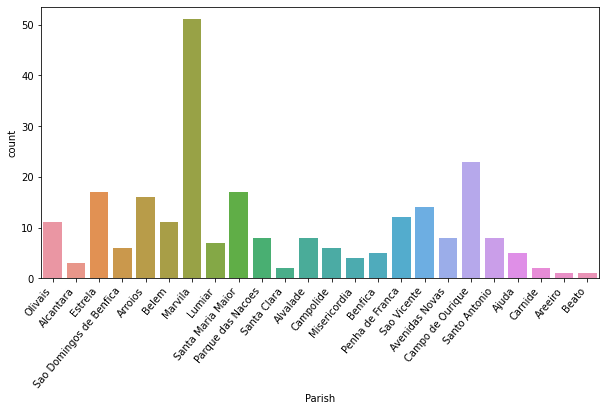

In [152]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df_Lisbon_Houses['Parish'],ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")

The number of apartments per parish seems to be balanced, except for Marvila that the value is higher when comparing to the other parishes, probably there are more houses' offers in that area

Now lets see impact of the parish feature on the price of house

[Text(0, 0, 'Olivais'),
 Text(0, 0, 'Alcantara'),
 Text(0, 0, 'Estrela'),
 Text(0, 0, 'Sao Domingos de Benfica'),
 Text(0, 0, 'Arroios'),
 Text(0, 0, 'Belem'),
 Text(0, 0, 'Marvila'),
 Text(0, 0, 'Lumiar'),
 Text(0, 0, 'Santa Maria Maior'),
 Text(0, 0, 'Parque das Nacoes'),
 Text(0, 0, 'Santa Clara'),
 Text(0, 0, 'Alvalade'),
 Text(0, 0, 'Campolide'),
 Text(0, 0, 'Misericordia'),
 Text(0, 0, 'Benfica'),
 Text(0, 0, 'Penha de Franca'),
 Text(0, 0, 'Sao Vicente'),
 Text(0, 0, 'Avenidas Novas'),
 Text(0, 0, 'Campo de Ourique'),
 Text(0, 0, 'Santo Antonio'),
 Text(0, 0, 'Ajuda'),
 Text(0, 0, 'Carnide'),
 Text(0, 0, 'Areeiro'),
 Text(0, 0, 'Beato')]

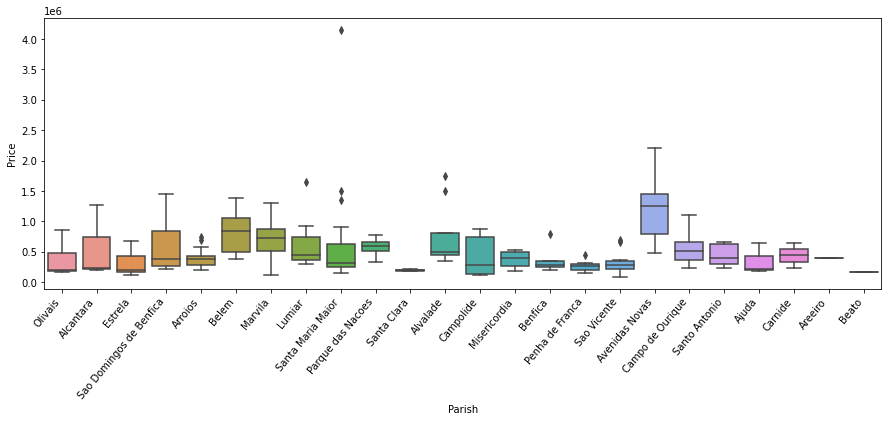

In [157]:
fig, ax =plt.subplots(figsize=(15,5))
sns.boxplot(x='Parish', y='Price', data=df_Lisbon_Houses, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")

It shows that the Avenidas Novas is the area that has the highest house' price. Moreover, there some outliers in some parishes

#### Bedrooms and Bathrooms Features

In [154]:
df_Lisbon_Houses['Bedrooms'].value_counts()

2     78
3     76
1     51
4     22
5      8
6      4
0      4
11     1
8      1
7      1
Name: Bedrooms, dtype: int64

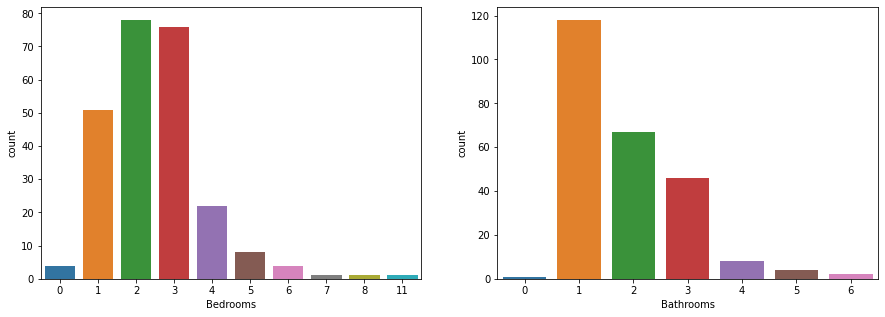

In [155]:
fig, ax =plt.subplots(1,2, figsize=(15,5))
sns.countplot(df_Lisbon_Houses['Bedrooms'], ax=ax[0])
sns.countplot(df_Lisbon_Houses['Bathrooms'], ax=ax[1])


As excepted, there are more apartments with 1-3 bedrooms and bathrooms

Lets now see the correlation between the number of bedrooms and bathrooms in the price of house

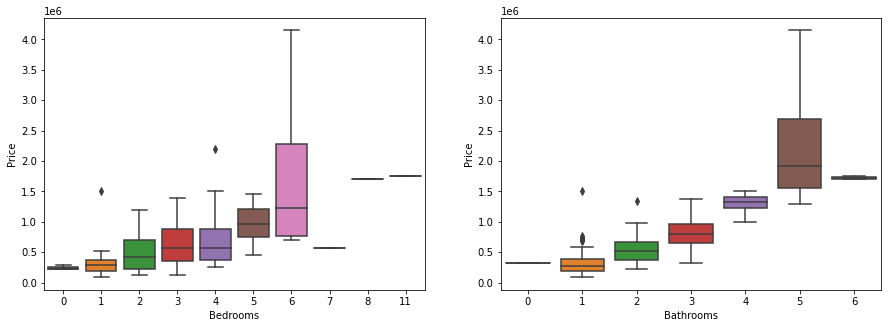

In [156]:
fig, ax =plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x='Bedrooms', y='Price', data=df_Lisbon_Houses, ax=ax[0])
sns.boxplot(x='Bathrooms', y='Price', data=df_Lisbon_Houses, ax=ax[1])

it can be seen that on average the price of the apartments increase with the number of bathrooms and bedrooms.

#### Area Net Feature

In [159]:
df_Lisbon_Houses['AreaNet'].value_counts()

79     8
50     7
139    6
130    6
145    6
      ..
158    1
160    1
164    1
168    1
105    1
Name: AreaNet, Length: 123, dtype: int64

Lets see the impact of Area Net on the price of the houses

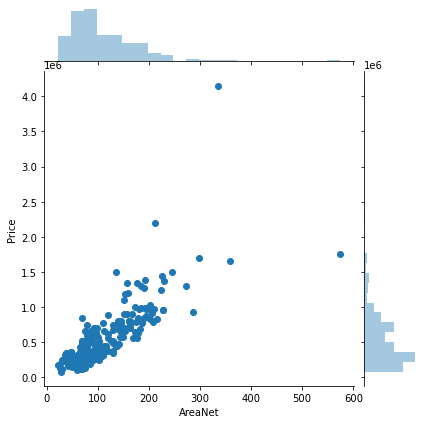

In [160]:
sns.jointplot(x='AreaNet', y='Price', data=df_Lisbon_Houses[['AreaNet','Price']])

By this figure, it is possible to see two outliers. So, let's remove them from the dataset

In [161]:
df_Lisbon_Houses=df_Lisbon_Houses[df_Lisbon_Houses['Price']<4000000]
df_Lisbon_Houses=df_Lisbon_Houses[df_Lisbon_Houses['AreaNet']<500]

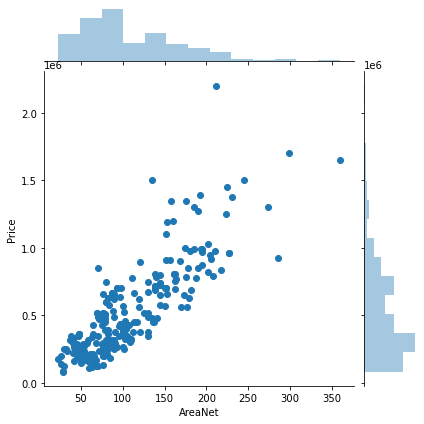

In [162]:
sns.jointplot(x='AreaNet', y='Price', data=df_Lisbon_Houses[['AreaNet','Price']])

It can be seen that there is a positive correlation between the area net and the price of the house

### Let's visualize the Parishes on a map

Get the Lisbon Parishes in a single data set

In [163]:
lisbon_parishes=df_Lisbon_Houses[['Parish','Latitude','Longitude']]
lisbon_parishes.drop_duplicates(subset=['Parish'],inplace=True)
lisbon_parishes.shape

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(24, 3)

Using the geopy library to get the latitude and longitude of Lisbon

In [164]:
address='Grande Lisboa'
geolocator = Nominatim(user_agent="ny_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lisbon are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lisbon are 38.86879605, -9.190655369225416.


In [165]:
# create map of Lisbon using latitude and longitude values
map_lisbon = folium.Map(location=[latitude, longitude], zoom_start=10,tiles='cartodb positron')

# add markers to map
for lat, lng, parish in zip(lisbon_parishes['Latitude'], lisbon_parishes['Longitude'], lisbon_parishes['Parish']):
    label = '{}'.format(parish)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lisbon)  
    
map_lisbon    

Lets now group the data by parish and average the result

In [166]:
Avg_Lisbon=df_Lisbon_Houses[['Parish','Latitude','Longitude','Bedrooms','Bathrooms','AreaNet','Price M2','Price']]

Avg_Lisbon=Avg_Lisbon.groupby('Parish').mean().reset_index()

Avg_Lisbon.head()

,Parish,Latitude,Longitude,Bedrooms,Bathrooms,AreaNet,Price M2,Price
0,Ajuda,38.704880,-9.200220,1.400000,1.400000,61.800000,3137.0,332500.000000
1,Alcantara,38.705900,-9.180467,2.666667,1.666667,95.000000,3125.0,564966.666667
2,Alvalade,38.748800,-9.143900,3.285714,2.285714,131.857143,3623.0,611428.571429
3,Areeiro,38.743700,-9.129600,2.000000,2.000000,104.000000,3312.0,400000.000000
4,Arroios,38.728031,-9.137150,3.125000,1.375000,97.937500,3277.0,394368.750000


Now lets highlight the avereage price of a house for each parish in Lisbon
To do so, the Folium library is utilized!  

In [167]:
# create map of Lisbon using latitude and longitude values

# create map of Lisbon using latitude and longitude values
map_lisbon = folium.Map(location=[latitude, longitude], zoom_start=10,tiles='cartodb positron')

# add markers to map
for lat, lng, parish, area, price in zip(Avg_Lisbon['Latitude'], Avg_Lisbon['Longitude'], Avg_Lisbon['Parish'],Avg_Lisbon['AreaNet'],Avg_Lisbon['Price']):
    
    html=f"""
        <h1> {parish}</h1>
        <p>Details of Apartements:</p>
        <ul>
            <li>Av. Area Net: {round(area)}m2 </li>
            <li>Av. Price: {round(price)}€</li>
        </ul>
        </p>
        """
    iframe = folium.IFrame(html=html, width=200, height=200)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker(
        location=[lat, lng],
        popup=popup,
        icon=folium.DivIcon(html=f"""
            <div><svg>
                <rect x="5", y="10" width="10" height="10", fill="red", opacity=".3" 
            </svg></div>""")).add_to(map_lisbon)  
    
map_lisbon

### Get Foursquare data

First define the Foursquare credentials

In [168]:
CLIENT_ID='Z51N3CSODB4FQWIPMLHCE3B0RI4B25P41MZY2B3D2MUFPJ0H'

CLIENT_SECRET='O44WPSPVBBIGGGXBX5BSDWQYCL01NBJK3DCI4UJI244NPGKL'

VERSION='20180605'

LIMIT = 100 # A default Foursquare API limit value

Create a function to get the closest venus for each parish in lisbon

In [169]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Parish', 
                  'Parish Latitude', 
                  'Parish Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [170]:
lisbon_venues=getNearbyVenues(names=lisbon_parishes['Parish'], latitudes=lisbon_parishes['Latitude'], longitudes=lisbon_parishes['Longitude'])

Olivais
Alcantara
Estrela
Sao Domingos de Benfica
Arroios
Belem
Marvila
Lumiar
Santa Maria Maior
Parque das Nacoes
Santa Clara
Alvalade
Campolide
Misericordia
Benfica
Penha de Franca
Sao Vicente
Avenidas Novas
Campo de Ourique
Santo Antonio
Ajuda
Carnide
Areeiro
Beato


In [171]:
print(lisbon_venues.shape)
lisbon_venues.head()

(968, 7)


,Parish,Parish Latitude,Parish Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Olivais,38.7792,-9.1186,Associação Desportiva e Cultural da Encarnação...,38.777618,-9.121072,Soccer Field
1,Olivais,38.7792,-9.1186,A Galinha Gorda,38.776810,-9.119544,Restaurant
2,Olivais,38.7792,-9.1186,Boa Sorte,38.776434,-9.119288,Chinese Restaurant
3,Olivais,38.7792,-9.1186,Telsão,38.776929,-9.119532,Furniture / Home Store
4,Olivais,38.7792,-9.1186,Burger King,38.779849,-9.122516,Fast Food Restaurant


In [172]:
lisbon_venues.groupby('Parish').count()

,Parish Latitude,Parish Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Parish,,,,,,
Ajuda,10,10,10,10,10,10
Alcantara,45,45,45,45,45,45
Alvalade,83,83,83,83,83,83
Areeiro,15,15,15,15,15,15
Arroios,27,27,27,27,27,27
Avenidas Novas,91,91,91,91,91,91
Beato,4,4,4,4,4,4
Belem,53,53,53,53,53,53
Benfica,17,17,17,17,17,17


In [173]:
print('There are {} uniques categories.'.format(len(lisbon_venues['Venue Category'].unique())))

There are 186 uniques categories.


Analyze each parish by getting the Venue Category

In [175]:
# one hot encoding
lisbon_onehot = pd.get_dummies(lisbon_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lisbon_onehot['Parish'] = lisbon_venues['Parish'] 

# move neighborhood column to the first column
fixed_columns = [lisbon_onehot.columns[-1]] + list(lisbon_onehot.columns[:-1])
lisbon_onehot = lisbon_onehot[fixed_columns]

lisbon_onehot.head()

,Parish,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Theme Park,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Olivais,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Olivais,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Olivais,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Olivais,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Olivais,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
lisbon_onehot.shape

(968, 187)

Next, let's group rows by parish and by taking the mean for each venue category

In [181]:
lisbon_grouped = lisbon_onehot.groupby('Parish').mean().reset_index()
lisbon_grouped


,Parish,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Theme Park,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Ajuda,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Alcantara,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Alvalade,0.012048,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012048,0.000000,0.012048,0.000000,0.012048,0.000000,0.000000,0.000000,0.000000,0.012048
3,Areeiro,0.000000,0.00,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000
4,Arroios,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000
5,Avenidas Novas,0.000000,0.00,0.000000,0.010989,0.000000,0.000000,0.021978,0.000000,0.010989,...,0.000000,0.000000,0.000000,0.000000,0.032967,0.000000,0.000000,0.000000,0.000000,0.000000
6,Beato,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Belem,0.000000,0.00,0.000000,0.000000,0.000000,0.018868,0.037736,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018868,0.000000,0.000000
8,Benfica,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000
9,Campo de Ourique,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.010638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [178]:
lisbon_grouped.shape

(24, 187)

Define a function to sort venues in descending order of its frequency

In [182]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create a dataset with the 10 venues for each parish

In [183]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Parish']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Parish'] = lisbon_grouped['Parish']

for ind in np.arange(lisbon_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lisbon_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Parish,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ajuda,Supermarket,Pool,Chinese Restaurant,Soccer Field,Gas Station,Fast Food Restaurant,Tennis Court,Sandwich Place,Portuguese Restaurant,Dim Sum Restaurant
1,Alcantara,Bakery,Portuguese Restaurant,Café,Mediterranean Restaurant,Dessert Shop,Restaurant,Indian Restaurant,Seafood Restaurant,Coffee Shop,Comfort Food Restaurant
2,Alvalade,Portuguese Restaurant,Bar,Restaurant,Hotel,Supermarket,Bakery,Plaza,Café,Pizza Place,Steakhouse
3,Areeiro,Portuguese Restaurant,Indian Restaurant,Pizza Place,Stadium,Electronics Store,Bakery,Motorcycle Shop,Coffee Shop,BBQ Joint,Ice Cream Shop
4,Arroios,Café,Portuguese Restaurant,Hotel,Hostel,Middle Eastern Restaurant,Supermarket,Plaza,Bakery,Farmers Market,Chinese Restaurant


#### Cluster Parishes

Run k-means algorithm to divide the parishes into 2 clusters (commercial and residential areas)

In [184]:
# set number of clusters
kclusters = 2

lisbon_grouped_clustering = lisbon_grouped.drop('Parish', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lisbon_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

Lets create a new data frame that includes the clustering information 

In [185]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

lisbon_merged = Avg_Lisbon

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
lisbon_merged = lisbon_merged.join(neighborhoods_venues_sorted.set_index('Parish'), on='Parish')

lisbon_merged.head() # check the last columns!

,Parish,Latitude,Longitude,Bedrooms,Bathrooms,AreaNet,Price M2,Price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ajuda,38.704880,-9.200220,1.400000,1.400000,61.800000,3137.0,332500.000000,1,Supermarket,Pool,Chinese Restaurant,Soccer Field,Gas Station,Fast Food Restaurant,Tennis Court,Sandwich Place,Portuguese Restaurant,Dim Sum Restaurant
1,Alcantara,38.705900,-9.180467,2.666667,1.666667,95.000000,3125.0,564966.666667,0,Bakery,Portuguese Restaurant,Café,Mediterranean Restaurant,Dessert Shop,Restaurant,Indian Restaurant,Seafood Restaurant,Coffee Shop,Comfort Food Restaurant
2,Alvalade,38.748800,-9.143900,3.285714,2.285714,131.857143,3623.0,611428.571429,0,Portuguese Restaurant,Bar,Restaurant,Hotel,Supermarket,Bakery,Plaza,Café,Pizza Place,Steakhouse
3,Areeiro,38.743700,-9.129600,2.000000,2.000000,104.000000,3312.0,400000.000000,0,Portuguese Restaurant,Indian Restaurant,Pizza Place,Stadium,Electronics Store,Bakery,Motorcycle Shop,Coffee Shop,BBQ Joint,Ice Cream Shop
4,Arroios,38.728031,-9.137150,3.125000,1.375000,97.937500,3277.0,394368.750000,0,Café,Portuguese Restaurant,Hotel,Hostel,Middle Eastern Restaurant,Supermarket,Plaza,Bakery,Farmers Market,Chinese Restaurant


In [186]:
lisbon_merged['Cluster Labels'].value_counts()

0    19
1     5
Name: Cluster Labels, dtype: int64

Visualize the different clusters

In [187]:
cluster1 = lisbon_merged.loc[lisbon_merged['Cluster Labels'] == 0, lisbon_merged.columns[[0] + list(range(5, lisbon_merged.shape[1]))]]
cluster1

,Parish,AreaNet,Price M2,Price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Alcantara,95.000000,3125.0,5.649667e+05,0,Bakery,Portuguese Restaurant,Café,Mediterranean Restaurant,Dessert Shop,Restaurant,Indian Restaurant,Seafood Restaurant,Coffee Shop,Comfort Food Restaurant
2,Alvalade,131.857143,3623.0,6.114286e+05,0,Portuguese Restaurant,Bar,Restaurant,Hotel,Supermarket,Bakery,Plaza,Café,Pizza Place,Steakhouse
3,Areeiro,104.000000,3312.0,4.000000e+05,0,Portuguese Restaurant,Indian Restaurant,Pizza Place,Stadium,Electronics Store,Bakery,Motorcycle Shop,Coffee Shop,BBQ Joint,Ice Cream Shop
4,Arroios,97.937500,3277.0,3.943688e+05,0,Café,Portuguese Restaurant,Hotel,Hostel,Middle Eastern Restaurant,Supermarket,Plaza,Bakery,Farmers Market,Chinese Restaurant
5,Avenidas Novas,186.125000,3841.0,1.224125e+06,0,Coffee Shop,Portuguese Restaurant,Restaurant,Hotel,Café,Spanish Restaurant,Ice Cream Shop,Burger Joint,Vegetarian / Vegan Restaurant,Art Museum
7,Belem,152.727273,3542.0,8.270909e+05,0,Portuguese Restaurant,Restaurant,Ice Cream Shop,Garden,Art Museum,Sushi Restaurant,Monument / Landmark,Hotel,Coffee Shop,Nightclub
8,Benfica,114.000000,2727.0,3.721000e+05,0,Gym,Café,Portuguese Restaurant,Pizza Place,Chinese Restaurant,Clothing Store,Bakery,Coffee Shop,Park,Pub
9,Campo de Ourique,76.086957,3859.0,5.429130e+05,0,Portuguese Restaurant,Restaurant,Bakery,Bar,Hotel,Electronics Store,Clothing Store,Steakhouse,Café,Brazilian Restaurant
10,Campolide,89.166667,3036.0,4.192500e+05,0,Portuguese Restaurant,Furniture / Home Store,Restaurant,Electronics Store,Bakery,Hotel,Cosmetics Shop,Dim Sum Restaurant,Clothing Store,Chocolate Shop
12,Estrela,66.411765,4005.0,2.896471e+05,0,Hotel,Portuguese Restaurant,Coffee Shop,Nightclub,Café,Italian Restaurant,Himalayan Restaurant,Lounge,Palace,Plaza


In [188]:
cluster2 = lisbon_merged.loc[lisbon_merged['Cluster Labels'] == 1, lisbon_merged.columns[[0] + list(range(5, lisbon_merged.shape[1]))]]
cluster2

,Parish,AreaNet,Price M2,Price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ajuda,61.800000,3137.0,332500.000000,1,Supermarket,Pool,Chinese Restaurant,Soccer Field,Gas Station,Fast Food Restaurant,Tennis Court,Sandwich Place,Portuguese Restaurant,Dim Sum Restaurant
6,Beato,65.000000,2534.0,163500.000000,1,Portuguese Restaurant,Garden,General Entertainment,Soccer Field,Frozen Yogurt Shop,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market
11,Carnide,111.500000,3027.0,440000.000000,1,Portuguese Restaurant,Restaurant,Café,Automotive Shop,Dessert Shop,Department Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop
16,Olivais,94.363636,2463.0,365909.090909,1,Chinese Restaurant,Furniture / Home Store,Restaurant,Soccer Field,Fast Food Restaurant,Sandwich Place,Empanada Restaurant,Food Court,Food & Drink Shop,Flower Shop
19,Santa Clara,60.500000,2393.0,197500.000000,1,Portuguese Restaurant,Garden,Restaurant,Bakery,Falafel Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop


By analyzing the clusters, it can be seen that the cluster 2 is more residential since it contains more Supermarkets, Gardens and Bakeries, whereas cluster 1 can be considered more comercial/touristic in the sense that it contains more hotels/hostels and restaurants 

## Final Output

A Map plot that highlights the average price/area of houses in each parish and the clustering of Lisbon's parishes by being more residential or turistic/commercial.  

In [189]:
# create map of Lisbon using latitude and longitude values
map_lisbon = folium.Map(location=[latitude, longitude], zoom_start=10,tiles='cartodb positron')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

# add markers to map
for lat, lng, parish, area, price, cluster in zip(lisbon_merged['Latitude'], lisbon_merged['Longitude'], lisbon_merged['Parish'],lisbon_merged['AreaNet'],lisbon_merged['Price'],lisbon_merged['Cluster Labels']):
    
    if (cluster==0):
        typeArea='Commercial/Touristic'
    else:
        typeArea='Residential'
    
    
    html=f"""
        <h1> {parish}</h1>
        <p>Details of Apartements:</p>
        <ul>
            <li>Type of Parish: {typeArea} </li>
            <li>Av. Area Net: {round(area)}m2 </li>
            <li>Av. Price: {round(price)}€</li>
        </ul>
        </p>
        """
    iframe = folium.IFrame(html=html, width=200, height=200)
    popup = folium.Popup(iframe, max_width=2650)
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=popup,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_lisbon)  
    
map_lisbon